In [1]:
%pylab inline
import pandas as pd
import sklearn.ensemble as sk_ensemble
import sklearn.cross_validation as sk_cv

Populating the interactive namespace from numpy and matplotlib


In [2]:
def rmsle(actual, predicted):
    '''
    Root mean square log error
    '''
    error = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(np.square(error)))

In [3]:
train_df = pd.read_csv('../train_set_adjusted.csv')

In [29]:
# print train_df.shape
# print train_df.columns

In [5]:
tube = pd.read_csv('../tube_material_id_imputed_dummies_drop_ns.csv')

In [30]:
# print tube.shape
# print tube.columns

In [7]:
spec = pd.read_csv('../spec_dummies.csv')

In [31]:
# print spec.shape
# print spec.columns

In [9]:
comp = pd.read_csv('../comp_type_dummies.csv')

In [32]:
# print comp.shape
# print comp.columns

In [11]:
comp_type_weight = pd.read_csv('../comp_type_weight.csv')

In [33]:
# print comp_type_weight.shape
# print comp_type_weight.columns

In [13]:
tube_vol = pd.read_csv('../tube_volume.csv')

In [14]:
train = pd.merge(train_df, tube)
train = pd.merge(train, spec)
train = pd.merge(train, comp_type_weight)
train = pd.merge(train, tube_vol)

In [34]:
# train.dtypes

In [16]:
train_sub_train, train_sub_cv = sk_cv.train_test_split(train, train_size = 0.7, random_state = 0)

In [17]:
print train_sub_train.shape
print train_sub_cv.shape

(21149, 264)
(9064, 264)


In [24]:
X = train_sub_train.drop(['tube_assembly_id', 'quote_date', 'cost'], axis=1).values
Y = np.log1p(train_sub_train.cost)
rf = sk_ensemble.RandomForestRegressor(n_estimators=100, verbose=0, random_state=0, n_jobs=4, oob_score=True)
rf = rf.fit(X, Y)

In [ ]:
rf.

In [50]:
X_cv = train_sub_cv.drop(['tube_assembly_id', 'quote_date', 'cost'], axis=1).values
y_cv = train_sub_cv.cost
y_cv_fitted = np.expm1(rf.predict(X_cv))

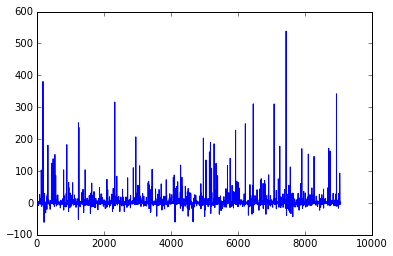

In [51]:
plt.plot(y_cv - y_cv_fitted)

In [28]:
rmsle(y_cv, y_cv_fitted)

0.24087091321402454

In [37]:
xtrees = sk_ensemble.ExtraTreesRegressor(n_estimators=100, verbose=0, random_state=0, n_jobs=4, oob_score=True, bootstrap=True)
xtrees = xtrees.fit(X, Y)

In [39]:
y_cv_fitted = np.expm1(xtrees.predict(X_cv))
rmsle(y_cv, y_cv_fitted)

0.24564778090491096

In [48]:
gb = sk_ensemble.GradientBoostingRegressor(n_estimators=1000, verbose=0, random_state=0)
gb = gb.fit(X, Y)

In [49]:
y_cv_fitted = np.expm1(gb.predict(X_cv))
rmsle(y_cv, y_cv_fitted)

0.23421266045446087